In [1]:
import os

import pandas as pd
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from styles import *

In [2]:
gaze = pd.read_pickle('data/Gaze.pkl')
eer = pd.read_pickle('data/eer_self.pkl')

eer['scale_group'] = eer['scale']
eer['x'] = 'original'
gaze['s2'] = gaze['scale_group'] + 'S'
gaze.replace('Comb-reverse', 'Comb Reverse', inplace=True)

In [3]:
eer2 = pd.read_pickle('data/eer_base.pkl')
eer2['x'] = 'filtered'
eer2['scale_group'] = eer2['scale']

eer = pd.concat([eer, eer2])

In [38]:
gaze

,gaze_angle_error_source,gaze_angle_error_filtered,filter,Filter,scale_group,s2,eer,frr,f1,precision,recall,Gaze error,EER,TAR,relative
0,1.528435,0.876621,bilateral_filter,Bilateral filter,1x,1xS,0.074348,0.409203,0.279598,0.530805,0.590797,0.876621,7.43475,0.590797,0.573542
1,1.683287,3.377988,bilateral_filter,Bilateral filter,1x,1xS,0.074348,0.409203,0.279598,0.530805,0.590797,3.377988,7.43475,0.590797,2.006780
2,0.834842,2.074067,bilateral_filter,Bilateral filter,1x,1xS,0.074348,0.409203,0.279598,0.530805,0.590797,2.074067,7.43475,0.590797,2.484384
3,0.489678,2.120429,bilateral_filter,Bilateral filter,1x,1xS,0.074348,0.409203,0.279598,0.530805,0.590797,2.120429,7.43475,0.590797,4.330248
4,2.176911,1.718885,bilateral_filter,Bilateral filter,1x,1xS,0.074348,0.409203,0.279598,0.530805,0.590797,1.718885,7.43475,0.590797,0.789598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.655202,47.769411,super_filter_reverse,Comb Reverse,10x,10xS,0.220342,1.000000,NaN,NaN,0.000000,47.769411,22.03417,0.000000,72.907929
246,0.288310,3.494390,super_filter_reverse,Comb Reverse,10x,10xS,0.220342,1.000000,NaN,NaN,0.000000,3.494390,22.03417,0.000000,12.120233
247,1.644007,11.559635,super_filter_reverse,Comb Reverse,10x,10xS,0.220342,1.000000,NaN,NaN,0.000000,11.559635,22.03417,0.000000,7.031376
248,0.819984,1.433844,super_filter_reverse,Comb Reverse,10x,10xS,0.220342,1.000000,NaN,NaN,0.000000,1.433844,22.03417,0.000000,1.748624


In [4]:
def rowfunc(row):
    scale = (eer['scale_group'] == row.s2)
    filt = (eer['filter'] == row.Filter)
    ev = eer[scale & filt]['eer']
    return float(ev)

def rowfunc2(row):
    scale = (eer['scale_group'] == row.s2)
    filt = (eer['filter'] == row.Filter)
    ev = eer[scale & filt]['t_frr']
    return float(ev)

gaze['eer'] = gaze.apply(rowfunc, axis=1)
gaze['frr'] = gaze.apply(rowfunc2, axis=1)

In [5]:
def rowfunc3(row):
    scale = (eer['scale_group'] == row.s2)
    filt = (eer['filter'] == row.Filter)
    ev = eer[scale & filt]['t_f1']
    return float(ev)

def rowfunc4(row):
    scale = (eer['scale_group'] == row.s2)
    filt = (eer['filter'] == row.Filter)
    ev = eer[scale & filt]['t_precision']
    return float(ev)

def rowfunc5(row):
    scale = (eer['scale_group'] == row.s2)
    filt = (eer['filter'] == row.Filter)
    ev = eer[scale & filt]['t_recall']
    return float(ev)

gaze['f1'] = gaze.apply(rowfunc3, axis=1)
gaze['precision'] = gaze.apply(rowfunc4, axis=1)
gaze['recall'] = gaze.apply(rowfunc5, axis=1)

In [6]:
gaze['Gaze error'] = gaze['gaze_angle_error_filtered']
gaze['EER'] = gaze['eer']*100
gaze['TAR'] = 1-gaze['frr']

In [9]:
gaze['relative'] = gaze['gaze_angle_error_filtered'] / gaze['gaze_angle_error_source']

In [36]:
gaze

,gaze_angle_error_source,gaze_angle_error_filtered,filter,Filter,scale_group,s2,eer,frr,f1,precision,recall,Gaze error,EER,TAR,relative
0,1.528435,0.876621,bilateral_filter,Bilateral filter,1x,1xS,0.074348,0.409203,0.279598,0.530805,0.590797,0.876621,7.43475,0.590797,0.573542
1,1.683287,3.377988,bilateral_filter,Bilateral filter,1x,1xS,0.074348,0.409203,0.279598,0.530805,0.590797,3.377988,7.43475,0.590797,2.006780
2,0.834842,2.074067,bilateral_filter,Bilateral filter,1x,1xS,0.074348,0.409203,0.279598,0.530805,0.590797,2.074067,7.43475,0.590797,2.484384
3,0.489678,2.120429,bilateral_filter,Bilateral filter,1x,1xS,0.074348,0.409203,0.279598,0.530805,0.590797,2.120429,7.43475,0.590797,4.330248
4,2.176911,1.718885,bilateral_filter,Bilateral filter,1x,1xS,0.074348,0.409203,0.279598,0.530805,0.590797,1.718885,7.43475,0.590797,0.789598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.655202,47.769411,super_filter_reverse,Comb Reverse,10x,10xS,0.220342,1.000000,NaN,NaN,0.000000,47.769411,22.03417,0.000000,72.907929
246,0.288310,3.494390,super_filter_reverse,Comb Reverse,10x,10xS,0.220342,1.000000,NaN,NaN,0.000000,3.494390,22.03417,0.000000,12.120233
247,1.644007,11.559635,super_filter_reverse,Comb Reverse,10x,10xS,0.220342,1.000000,NaN,NaN,0.000000,11.559635,22.03417,0.000000,7.031376
248,0.819984,1.433844,super_filter_reverse,Comb Reverse,10x,10xS,0.220342,1.000000,NaN,NaN,0.000000,1.433844,22.03417,0.000000,1.748624


In [34]:
m = ft.groupby(['Filter', 'scale']).mean()
m['relative_real'] = m['gaze_angle_error_filtered'] / m['gaze_angle_error_source']
m

gaze_angle_error_source  gaze_angle_error_filtered  \
Filter           scale                                                       
Bilateral filter 1.0                   1.231023                   1.356724   
                 1.5                   1.231023                   2.341536   
                 2.0                   1.231023                   2.761225   
                 5.0                   1.231023                   6.994988   
                 10.0                  1.231023                  10.119690   
Cauchy noise     1.0                   1.231023                   1.551098   
                 1.5                   1.231023                   2.331350   
                 2.0                   1.231023                   2.590556   
                 5.0                   1.231023                   7.079315   
                 10.0                  1.231023                  11.729155   
Comb             1.0                   1.231023                   1.854236   
                 1.5                   1.231023                   2.501665   
                 2.0                   1.231023                   2.822476   
                 5.0                   1.231023                  15.493697   
                 10.0                  1.231023                  13.249358   
Gaussian filter  1.0                   1.231023                   1.069476   
                 1.5                   1.231023                   2.600440   
                 2.0                   1.231023                   2.600440   
                 5.0                   1.231023                   2.600440   
                 10.0                  1.231023                   6.653206   
Non-local means  1.0                   1.231023                   1.269145   
                 1.5                   1.231023                   1.545102   
                 2.0                   1.231023                   1.584073   
                 5.0                   1.231023                   5.386682   
                 10.0                  1.231023                   5.386682   
Snow noise       1.0                   1.231023                   1.957208   
                 1.5                   1.231023                   2.255717   
                 2.0                   1.231023                   2.672486   
                 5.0                   1.231023                   3.442689   
                 10.0                  1.231023                  11.664742   

                             eer       frr        f1  precision    recall  \
Filter           scale                                                      
Bilateral filter 1.0    0.074348  0.409203  0.279598   0.530805  0.590797   
                 1.5    0.107673  0.506046  0.201549   0.340472  0.493954   
                 2.0    0.112909  0.517745  0.189566   0.312341  0.482255   
                 5.0    0.136483  0.604176  0.152827   0.248944  0.395824   
                 10.0   0.138072  0.614476  0.150388   0.246572  0.385524   
Cauchy noise     1.0    0.022128  0.769313  0.187446   1.000000  0.230687   
                 1.5    0.054719  0.987293  0.012548   1.000000  0.012707   
                 2.0    0.060486  0.993506  0.006452   1.000000  0.006494   
                 5.0    0.151097  0.999832  0.000168   1.000000  0.000168   
                 10.0   0.198895  0.999888  0.000112   1.000000  0.000112   
Comb             1.0    0.210516  0.999328  0.000671   1.000000  0.000672   
                 1.5    0.249053  1.000000       NaN        NaN  0.000000   
                 2.0    0.235263  1.000000       NaN        NaN  0.000000   
                 5.0    0.290841  1.000000       NaN        NaN  0.000000   
                 10.0   0.297221  1.000000       NaN        NaN  0.000000   
Gaussian filter  1.0    0.007514  0.046238  0.487999   0.999296  0.953762   
                 1.5    0.008410  0.043383  0.487588   0.994472  0.956617   
                 2.0    0.008410  0.043383  0.487588   0.994472 

In [11]:
included = [
    'Bilateral filter',
    'Gaussian filter',
    'Non-local means',
    'Cauchy noise',
    'Snow noise',
    'Comb',
    #'Comb Reverse'
]
ft = gaze[gaze['Filter'].isin(included)]

In [13]:
ft['Gaze relative'] = ft['relative']

/Users/Anton/anaconda3/envs/iaml/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
ft['scale'] = ft['scale_group'].apply(lambda s: float(s[:-1]))

/Users/Anton/anaconda3/envs/iaml/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


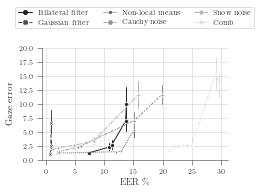

In [35]:
fig, ax = plt.subplots(1, 1, figsize=set_size('article-col'))
g = sns.lineplot(
    x='EER', 
    y='Gaze error', 
    hue='Filter', 
    data=ft, 
    palette=sns.color_palette("gray", 6),
    markers=True, 
    style='Filter',
    err_style='bars',
    legend=True,
    ax=ax)

sns.despine()

ax.set_xlabel('EER \%')
ax.set_ylim((0, 20))
#ax.set_xlim((10e-6, 1))
#ax.set_xscale('log')

g.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), ncol=3)
fig.savefig('out/gaze.pdf', bbox_inches='tight')

In [40]:
gaze['scale'] = gaze['scale_group'].apply(lambda s: float(s[:-1]))

In [41]:
comb = gaze.groupby(['Filter', 'scale_group']).mean()
comb['relative'] = comb['gaze_angle_error_filtered']/comb['gaze_angle_error_source']

In [42]:
c2 = comb.reset_index()
c2

,Filter,scale_group,gaze_angle_error_source,gaze_angle_error_filtered,eer,frr,f1,precision,recall,Gaze error,EER,TAR,scale,relative
0,Bilateral filter,1.5x,1.231023,2.341536,0.107673,0.506046,0.201549,0.340472,0.493954,2.341536,10.767251,0.493954,1.5,1.902106
1,Bilateral filter,10x,1.231023,10.119690,0.138072,0.614476,0.150388,0.246572,0.385524,10.119690,13.807196,0.385524,10.0,8.220552
2,Bilateral filter,1x,1.231023,1.356724,0.074348,0.409203,0.279598,0.530805,0.590797,1.356724,7.434750,0.590797,1.0,1.102111
3,Bilateral filter,2x,1.231023,2.761225,0.112909,0.517745,0.189566,0.312341,0.482255,2.761225,11.290852,0.482255,2.0,2.243033
4,Bilateral filter,5x,1.231023,6.994988,0.136483,0.604176,0.152827,0.248944,0.395824,6.994988,13.648305,0.395824,5.0,5.682256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Uniform noise,1.5x,1.231023,1.803991,0.043502,0.970499,0.028655,1.000000,0.029501,1.803991,4.350234,0.029501,1.5,1.465441
61,Uniform noise,10x,1.231023,11.920363,0.173957,0.999944,0.000056,1.000000,0.000056,11.920363,17.395701,0.000056,10.0,9.683297
62,Uniform noise,1x,1.231023,1.223227,0.020425,0.729680,0.212797,1.000000,0.270320,1.223227,2.042520,0.270320,1.0,0.993667
63,Uniform noise,2x,1.231023,2.145789,0.048434,0.982591,0.017111,1.000000,0.017409,2.145789,4.843386,0.017409,2.0,1.743094


In [59]:
c2.pivot(index='scale', columns='Filter', values=['eer'])

eer                                                      \
Filter Bilateral filter Cauchy noise      Comb Comb Reverse Gaussian filter   
scale                                                                         
1.0            0.074348     0.022128  0.210516     0.128614        0.007514   
1.5            0.107673     0.054719  0.249053     0.148699        0.008410   
2.0            0.112909     0.060486  0.235263     0.159314        0.008410   
5.0            0.136483     0.151097  0.290841     0.188158        0.008410   
10.0           0.138072     0.198895  0.297221     0.220342        0.009538   

                                                                 \
Filter Gaussian noise Laplacian noise Mean filter Median filter   
scale                                                             
1.0          0.026802        0.029996    0.007094      0.008003   
1.5          0.032880        0.029622    0.007094      0.008003   
2.0          0.066546        0.066598    0.007094      0.008003   
5.0          0.118174        0.146984    0.007735      0.008846   
10.0         0.204642        0.210920    0.009340      0.008846   

                                                                       
Filter Non-local means Salt-and-pepper noise Snow noise Uniform noise  
scale                                                                  
1.0           0.019573              0.049525   0.012420      0.020425  
1.5           0.120811              0.065692   0.020628      0.043502  
2.0           0.128917              0.111646   0.047827      0.048434  
5.0           0.151027              0.206262   0.081682      0.126277  
10.0          0.151027              0.242369   0.158088      0.173957

In [60]:
d = c2.pivot(index='Filter', columns=['scale'], values=['relative'])
d

relative                                          
scale                      1.0       1.5       2.0        5.0        10.0
Filter                                                                   
Bilateral filter       1.102111  1.902106  2.243033   5.682256   8.220552
Cauchy noise           1.260007  1.893831  2.104392   5.750758   9.527973
Comb                   1.506256  2.032184  2.292788  12.586033  10.762883
Comb Reverse           1.691954  2.490962  2.827323   5.921448  11.695600
Gaussian filter        0.868770  2.112422  2.112422   2.112422   5.404615
Gaussian noise         1.321484  1.357282  2.287872   4.398813  12.363403
Laplacian noise        1.444444  1.449862  2.363903   5.054720  11.906605
Mean filter            0.836769  0.836769  0.836769   1.102236   3.427295
Median filter          0.856796  0.856796  0.856796   2.959353   2.959353
Non-local means        1.030968  1.255136  1.286794   4.375777   4.375777
Salt-and-pepper noise  2.010670  1.801505  4.327218   8.692576  11.467722
Snow noise             1.589904  1.832392  2.170947   2.796608   9.475649
Uniform noise          0.993667  1.465441  1.743094   5.412937   9.683297

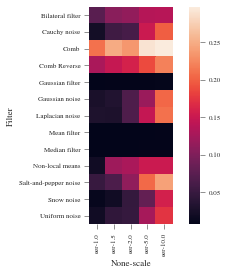

In [55]:
sns.heatmap(d, square=True)

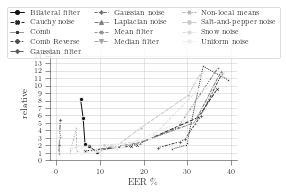

In [124]:
fig, ax = plt.subplots(1, 1, figsize=set_size('article-col'))
g = sns.lineplot(
    x='EER', 
    y='relative', 
    hue='Filter', 
    data=comb, 
    palette=sns.color_palette("gray", 13),
    markers=True, 
    style='Filter',
    err_style='bars',
    legend=True,
    ax=ax)

sns.despine()

ax.set_xlabel('EER \%')
ax.set_ylim((0, 15))
ax.set_yticks(np.arange(0, 15, 1))
#ax.set_xlim((10e-6, 1))
#ax.set_xscale('log')

g.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), ncol=3)
fig.savefig('out/gaze3.pdf', bbox_inches='tight')